### 拉格朗日有限元基函数计算展示代码 

In [49]:
def basis(self, bc, index=np.s_[:], p=None):
        """
        compute the basis function values at barycentric point bc

        Parameters
        ----------
        bc : numpy.ndarray
            the shape of `bc` can be `(TD+1,)` or `(NQ, TD+1)`
        Returns
        -------
        phi : numpy.ndarray
            the shape of 'phi' can be `(1, ldof)` or `(NQ, 1, ldof)`

        See Also
        --------

        Notes
        -----

        """
        if p is None:
            p = self.p

        if p == 0 and self.spacetype == 'D':
            shape = (len(bc.shape)+1)*(1, ) 
            print('shape:', shape)
            phi = np.ones(shape, dtype=self.ftype)

        TD = bc.shape[-1] - 1 
        multiIndex = self.multi_index_matrix[TD](p)

        c = np.arange(1, p+1, dtype=np.int_)
        P = 1.0/np.multiply.accumulate(c)
        t = np.arange(0, p)
        shape = bc.shape[:-1]+(p+1, TD+1)
        A = np.ones(shape, dtype=self.ftype)
        A[..., 1:, :] = p*bc[..., np.newaxis, :] - t.reshape(-1, 1)
        np.cumprod(A, axis=-2, out=A)
        A[..., 1:, :] *= P.reshape(-1, 1)
        idx = np.arange(TD+1)
        phi = np.prod(A[..., multiIndex, idx], axis=-1)
        return phi[..., np.newaxis, :] # (..., 1, ldof)

In [52]:
mesh.entity_barycenter('cell')

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [51]:
basis(mesh,p=3)

TypeError: basis() missing 1 required positional argument: 'bc'

In [47]:
p=5
c = np.arange(1, p+1)
P = np.multiply.accumulate(c)
P_ = 1/P

In [48]:
print(c,P,P_)

[1 2 3 4 5] [  1   2   6  24 120] [1.         0.5        0.16666667 0.04166667 0.00833333]


### start!

In [49]:
import numpy as np
from fealpy.mesh import MeshFactory as MF
import matplotlib.pyplot as plt # 画图
domain=[0,1,0,1]
mesh=MF.boxmesh2d(domain,nx=1,ny=1,meshtype='tri')

run boxmesh2d with time: 0.0010654000000158703


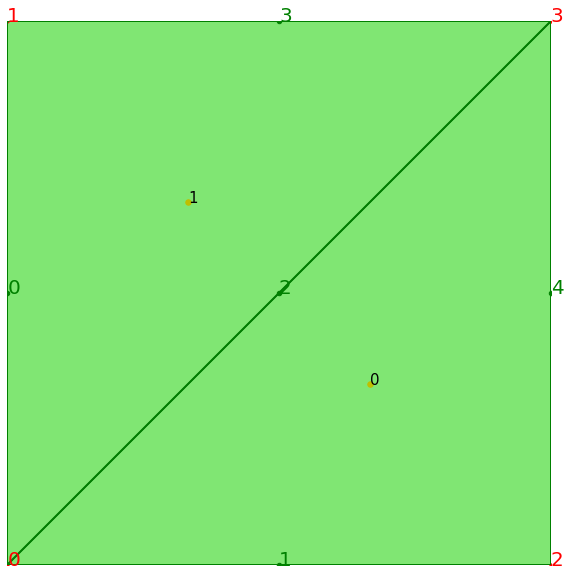

In [50]:
fig=plt.figure(figsize=(10,10))
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True,fontsize=20)
mesh.find_edge(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True)
plt.show()

In [51]:
cell=mesh.entity('cell')
edge=mesh.entity('edge')
node=mesh.entity('node')
display(cell,edge,node,mesh.p)

array([[2, 3, 0],
       [1, 0, 3]])

array([[1, 0],
       [0, 2],
       [3, 0],
       [3, 1],
       [2, 3]])

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

1

In [52]:
# p=mesh.p
p=5
print(p,mesh.p)

5 1


In [53]:
TD=mesh.top_dimension()
bc=mesh.entity_barycenter('cell') # 重心坐标
display(bc,TD)

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

2

In [58]:
# construct vector P=(1/1!,1/2!,...,1/P!)
c=np.arange(1,p+1,dtype=np.int)
P=1/np.multiply.accumulate(c)

# construct the matrix A.
t=np.arange(0,p)
shape=bc.shape[:-1]+(p+1,TD)
A=np.ones(shape)
A[...,1:,:]=p*bc[...,np.newaxis,:]-t.reshape(-1,1)

In [59]:
A

array([[[ 1.        ,  1.        ],
        [ 3.33333333,  1.66666667],
        [ 2.33333333,  0.66666667],
        [ 1.33333333, -0.33333333],
        [ 0.33333333, -1.33333333],
        [-0.66666667, -2.33333333]],

       [[ 1.        ,  1.        ],
        [ 1.66666667,  3.33333333],
        [ 0.66666667,  2.33333333],
        [-0.33333333,  1.33333333],
        [-1.33333333,  0.33333333],
        [-2.33333333, -0.66666667]]])

In [61]:
# construct matrix B and here we still use the memory of A
np.cumprod(A,axis=-2,out=A)
A[...,1:,:]*=P.reshape(-1,1)

In [62]:
A

array([[[ 1.00000000e+00,  1.00000000e+00],
        [ 3.33333333e+00,  1.66666667e+00],
        [ 1.29629630e+01,  9.25925926e-01],
        [ 4.48102423e+01, -1.14311843e-01],
        [ 3.87249008e+01, -1.41125732e-02],
        [-1.78485139e+01,  3.25228024e-03]],

       [[ 1.00000000e+00,  1.00000000e+00],
        [ 1.66666667e+00,  3.33333333e+00],
        [ 9.25925926e-01,  1.29629630e+01],
        [-1.14311843e-01,  4.48102423e+01],
        [-1.41125732e-02,  3.87249008e+01],
        [ 3.25228024e-03, -1.78485139e+01]]])

In [43]:
t

array([0, 1, 2, 3, 4])

In [44]:
display(A,A[...,1:,:],p*bc[...,np.newaxis,:]-t.reshape(-1,1))

array([[[ 1.        ,  1.        ],
        [ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667

array([[[ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667, -1.66666667],
        [ 1.66666667, -2.66666667],
        [ 0.66666667, -3.66666667]],

       [[ 0.66666667,  1.33333333],
        [-0.33333333,  0.33333333],
        [-1.333333

array([[[ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667, -1.66666667],
        [ 1.66666667, -2.66666667],
        [ 0.66666667, -3.66666667]],

       [[ 0.66666667,  1.33333333],
        [-0.33333333,  0.33333333],
        [-1.333333

In [46]:
display(bc.shape[:-1]+(p+1,TD+1)) # 单元个数|插值函数次数加一|拓扑维数加一

(50, 6, 3)

#### 重心坐标梯度的计算代码

In [30]:
# 源代码
domain=[0,1,0,1]
mesh=MF.boxmesh2d(domain,nx=1,ny=1,meshtype='tri')
NC=mesh.number_of_cells()

node=mesh.entity('node')
cell=mesh.entity('cell')
v0=node[cell[:,2],:]-node[cell[:,1],:] # x2-x1
v1=node[cell[:,0],:]-node[cell[:,2],:] # x0-x2
v2=node[cell[:,1],:]-node[cell[:,0],:] # x1-x0
nv=np.cross(v2,-v1)

Dlambda=np.zeros((NC,3,2))
length=nv
w=np.array([[0,1],[-1,0]])
Dlambda[:,0,:]=v0@w # /length.reshape[-1,1]
Dlambda[:,1,:]=v1@w # /length.reshape[-1,1]
Dlambda[:,2,:]=v2@w # /length.reshape[-1,1]

run boxmesh2d with time: 0.0016117999984999187


In [38]:
display(cell,cell[:,2],node,node[cell[:,2],:])

array([[2, 3, 0],
       [1, 0, 3]])

array([0, 3])

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

array([[0., 0.],
       [1., 1.]])

In [31]:
display(v2,-v1)

array([[ 0.,  1.],
       [ 0., -1.]])

array([[-1., -0.],
       [ 1., -0.]])

In [28]:
Dlambda

array([[[ 1., -1.],
        [ 0.,  1.],
        [-1.,  0.]],

       [[-1.,  1.],
        [ 0., -1.],
        [ 1.,  0.]]])

In [20]:
# np.cross(v2,-v1).reshape(-1,1)

array([[1.],
       [1.]])

In [18]:
display(length,Dlambda,v0,w)

array([1., 1.])

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

array([[-1., -1.],
       [ 1.,  1.]])

array([[ 0,  1],
       [-1,  0]])